### Keypoints
learn 
- fastjmd95
- pcolormesh to make geomap
- xrft to calculate PSD

In [1]:
import dask
dask.config.set({"logging.distributed": "warning"})
from dask.diagnostics import ProgressBar
ProgressBar().register()

In [2]:
# !pip install xgcm --upgrade

In [3]:
# from dask_gateway import GatewayCluster
# from dask.distributed import Client
# cluster = GatewayCluster()
# cluster.scale(5)
# client = Client(cluster)
# cluster

In [2]:
# Load some useful modules 
import numpy as np
import xarray as xr
import xrft
import intake
from xmitgcm import llcreader
from matplotlib import pyplot as plt
import dask.array as da
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xgcm

In [11]:
font = {'family' : 'monospace',
        'size'   : 12}

plt.rc('font', **font)

In [12]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

In [13]:
cat

llc4320:
  args:
    path: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [14]:
# Get variables from catalog
## load 
sst = cat.LLC4320_SST.to_dask()
sss = cat.LLC4320_SSS.to_dask()
ssh = cat.LLC4320_SSH.to_dask()
u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()

In [15]:
ds = xr.merge([ssh, sst, sss, u, v])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

In [16]:
coords = cat.LLC4320_grid.to_dask().reset_coords()
coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [17]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2,
              time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables: (12/30)
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    ...       ...
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

In [18]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, j: 12960, time: 9030, i_g: 17280, j_g: 12960,
              k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89 90
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
Data variables:
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    SST      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    SSS      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(9030,), meta=np.ndarray>
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>

[########################################] | 100% Completed | 1.52 sms


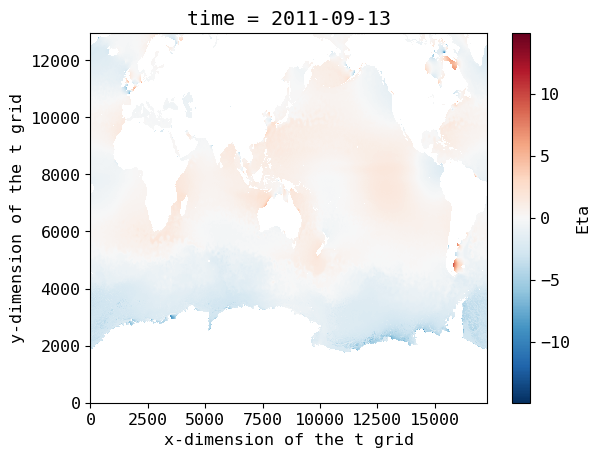

In [19]:
ds.Eta.isel(time=0,j=slice(0,None,10),i=slice(0,None,10)).plot()

In [27]:
i1=1000
i2=7000
j1=3000
j2=6000

In [28]:
SSH_sel = ds.Eta.sel(time=slice('2012-02-01','2012-04-30')).isel(i=slice(i1, i2,1),j=slice(j1,j2,1))
SSH_sel

<xarray.DataArray 'Eta' (time: 2160, j: 3000, i: 6000)>
dask.array<getitem, shape=(2160, 3000, 6000), dtype=float32, chunksize=(1, 1680, 3320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00

In [29]:
SSH_sel.isel(time=2)

<xarray.DataArray 'Eta' (j: 3000, i: 6000)>
dask.array<getitem, shape=(3000, 6000), dtype=float32, chunksize=(1680, 3320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
    time     datetime64[ns] 2012-02-01T02:00:00

[########################################] | 100% Completed | 912.01 ms


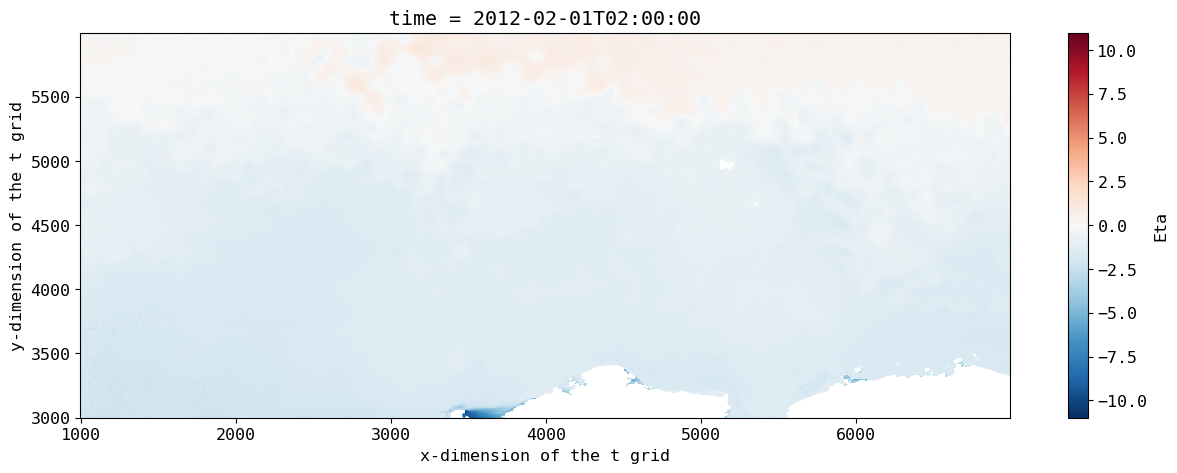

In [32]:
SSH_sel.isel(time=2,i=slice(0,None,10)).plot(shading='auto',figsize=(15,5))

In [33]:
dxC_sel = coords.dxC.isel(i_g=slice(i1,i2), j=slice(j1,j2))
dyG_sel = coords.dyG.isel(i_g=slice(i1,i2), j=slice(j1,j2))
dyC_sel = coords.dyC.isel(i=slice(i1,i2), j_g=slice(j1,j2))
dxG_sel = coords.dxG.isel(i=slice(i1,i2), j_g=slice(j1,j2))
XC_sel = coords.XC.isel(i=slice(i1,i2), j=slice(j1,j2))
YC_sel = coords.YC.isel(i=slice(i1,i2), j=slice(j1,j2))
# dyG_sel= coords.dyG.isel(i_g=slice(i1,i2), j=slice(j1,j2))

In [34]:
XC_sel

<xarray.DataArray 'XC' (j: 3000, i: 6000)>
dask.array<getitem, shape=(3000, 6000), dtype=float32, chunksize=(1680, 3320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [35]:
dx = (120*(XC_sel.isel(i=1) - 
            XC_sel.isel(i=0))*np.cos(
            YC_sel.mean('i')*np.pi/180)).mean('j')
dy=120*(YC_sel.isel(j=1)-YC_sel.isel(j=0)).mean('i')


In [36]:
# YC_sel.isel(i=1).load()
# XC_sel.isel(i=0)*YC_sel.mean('i')
np.cos(YC_sel.mean('i')*np.pi/180).load()
# YC_sel.mean('i').load()
# YC_sel.mean('i')
# YC_sel

[########################################] | 100% Completed | 609.82 ms


<xarray.DataArray 'YC' (j: 3000)>
array([0.35658735, 0.35671028, 0.35683268, ..., 0.8231302 , 0.8232869 ,
       0.8234435 ], dtype=float32)
Coordinates:
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999

In [37]:
dx.load()

[########################################] | 100% Completed | 508.11 ms


<xarray.DataArray ()>
array(1.4486275, dtype=float32)

In [38]:
dy.load()

[########################################] | 100% Completed | 508.41 ms


<xarray.DataArray 'YC' ()>
array(0.90179443, dtype=float32)

In [39]:
llc = xr.merge([SSH_sel, XC_sel, YC_sel])
llc

<xarray.Dataset>
Dimensions:  (i: 6000, j: 3000, time: 2160)
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2012-02-01 ... 2012-04-30T23:00:00
Data variables:
    Eta      (time, j, i) float32 dask.array<chunksize=(1, 1320, 3320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(1320, 3320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(1320, 3320), meta=np.ndarray>

In [40]:
ds_sel_loaded=llc.isel(time=0)
%time ds_sel_loaded.load()

[########################################] | 100% Completed | 1.32 sms
CPU times: user 2.2 s, sys: 778 ms, total: 2.98 s
Wall time: 1.83 s


<xarray.Dataset>
Dimensions:  (i: 6000, j: 3000)
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
    time     datetime64[ns] 2012-02-01
Data variables:
    Eta      (j, i) float32 -1.807 -1.81 -1.817 -1.829 ... 0.4613 0.4555 0.4515
    XC       (j, i) float32 -17.16 -17.14 -17.11 -17.09 ... 107.8 107.8 107.8
    YC       (j, i) float32 -69.11 -69.11 -69.11 -69.11 ... -34.57 -34.57 -34.57

In [41]:
ds_sel_loaded.sel(j=slice(4000,4500,1))

<xarray.Dataset>
Dimensions:  (i: 6000, j: 501)
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 4000 4001 4002 4003 4004 ... 4496 4497 4498 4499 4500
    time     datetime64[ns] 2012-02-01
Data variables:
    Eta      (j, i) float32 -1.244 -1.256 -1.268 -1.279 ... -1.024 -1.024 -1.025
    XC       (j, i) float32 -17.16 -17.14 -17.11 -17.09 ... 107.8 107.8 107.8
    YC       (j, i) float32 -60.41 -60.41 -60.41 -60.41 ... -54.98 -54.98 -54.98

In [42]:
# Wavenumber spectra, check how isotropic things are

SSH_ps_x = xrft.power_spectrum(ds_sel_loaded.sel(j=slice(4000,4500,1)).Eta,
                             dim=['i'],
                             window=True, 
                             detrend='constant').compute()

SSH_ps_y = xrft.power_spectrum(ds_sel_loaded.sel(j=slice(4000,4500,1)).Eta,
                             dim=['j'],
                             window=True, 
                             detrend='constant').compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [43]:
SSH_ps_x

<xarray.DataArray (j: 501, freq_i: 6000)>
array([[1.47374149e-10, 3.09678268e-10, 1.92951077e-10, ...,
        4.92482875e-10, 1.92951077e-10, 3.09678268e-10],
       [2.72218512e-10, 1.08025174e-10, 1.99851262e-10, ...,
        3.75125567e-10, 1.99851262e-10, 1.08025174e-10],
       [1.36158656e-10, 1.12240228e-10, 1.50155411e-10, ...,
        2.52289610e-10, 1.50155411e-10, 1.12240228e-10],
       ...,
       [2.89556631e-10, 2.91449318e-10, 2.88541911e-11, ...,
        4.34540597e-11, 2.88541911e-11, 2.91449318e-10],
       [4.89105705e-11, 1.75398193e-10, 8.33630747e-11, ...,
        7.78668509e-11, 8.33630747e-11, 1.75398193e-10],
       [4.00337251e-12, 3.68377234e-11, 3.26080420e-12, ...,
        2.66271433e-11, 3.26080420e-12, 3.68377234e-11]])
Coordinates:
  * j        (j) int64 4000 4001 4002 4003 4004 ... 4496 4497 4498 4499 4500
    time     datetime64[ns] 2012-02-01
  * freq_i   (freq_i) float64 -0.5 -0.4998 -0.4997 ... 0.4995 0.4997 0.4998

In [44]:
SSH_ps_y.freq_j

<xarray.DataArray 'freq_j' (freq_j: 501)>
array([-0.499002, -0.497006, -0.49501 , ...,  0.49501 ,  0.497006,  0.499002])
Coordinates:
    time     datetime64[ns] 2012-02-01
  * freq_j   (freq_j) float64 -0.499 -0.497 -0.495 -0.493 ... 0.495 0.497 0.499
Attributes:
    spacing:  0.0019960079840319334

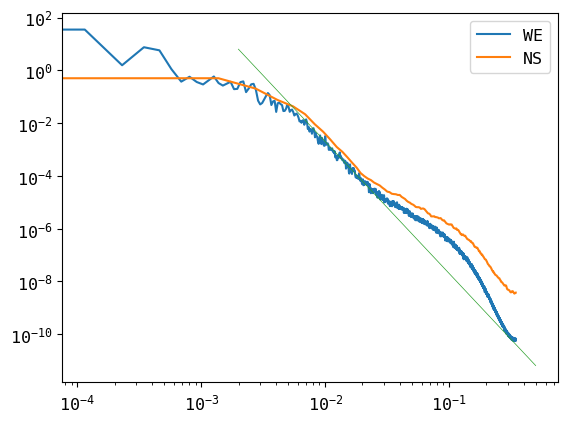

In [45]:
plt.plot(SSH_ps_x.freq_i/dx, SSH_ps_x.mean(['j']),label='WE')
plt.plot(SSH_ps_y.freq_j/dx, SSH_ps_y.mean(['i']),label='NS')
plt.plot(SSH_ps_y.freq_j, 2*1e-13*SSH_ps_y.freq_j**-5, linewidth=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()

In [46]:
ds_sel_loaded


<xarray.Dataset>
Dimensions:  (i: 6000, j: 3000)
Coordinates:
  * i        (i) int64 1000 1001 1002 1003 1004 ... 6995 6996 6997 6998 6999
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
    time     datetime64[ns] 2012-02-01
Data variables:
    Eta      (j, i) float32 -1.807 -1.81 -1.817 -1.829 ... 0.4613 0.4555 0.4515
    XC       (j, i) float32 -17.16 -17.14 -17.11 -17.09 ... 107.8 107.8 107.8
    YC       (j, i) float32 -69.11 -69.11 -69.11 -69.11 ... -34.57 -34.57 -34.57

In [50]:
inputdata=ds_sel_loaded.sel(j=slice(4000,4010,1)).Eta.interp(i=np.linspace(1000, 6999, 6000*1000))
inputdata

<xarray.DataArray 'Eta' (j: 11, i: 6000000)>
array([[-1.24430752, -1.2443197 , -1.24433189, ..., -1.51794096,
        -1.51794211, -1.51794326],
       [-1.26619971, -1.26620325, -1.2662068 , ..., -1.51960244,
        -1.51960344, -1.51960444],
       [-1.25813508, -1.25812752, -1.25811995, ..., -1.52103548,
        -1.52103641, -1.52103734],
       ...,
       [-1.14209795, -1.14209987, -1.14210179, ..., -1.52987858,
        -1.52987961, -1.52988064],
       [-1.15048349, -1.15047054, -1.15045759, ..., -1.5305029 ,
        -1.5305041 , -1.5305053 ],
       [-1.11626613, -1.11625095, -1.11623577, ..., -1.53091318,
        -1.53091434, -1.5309155 ]])
Coordinates:
  * j        (j) int64 4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010
    time     datetime64[ns] 2012-02-01
  * i        (i) float64 1e+03 1e+03 1e+03 ... 6.999e+03 6.999e+03 6.999e+03

In [51]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [52]:
dx*1000

<xarray.DataArray ()>
array(1448.62747192)

In [104]:
# wave = pd.read_csv('data/simu_wave_space_new.txt',sep='   ', header=None)
wave=np.loadtxt('data/simu_wave_space_new.txt') 
wave.shape
wave00 = xr.DataArray(wave[:,1], dims=["i"],coords={"i": wave[:,0]/(1000)})

# da_wave=wave[:,1].repeat(5) 
da_wave=np.tile(wave[:,1],100) 
da_wave.shape
# da_wave
foo = xr.DataArray(da_wave, dims=["i"],coords={"i": np.linspace(0, 5000100*10/1000/dx, 5000100)})

wavein=foo.interp(i=np.linspace(1000, 6999, 6000*1000))
wavein

<xarray.DataArray (i: 6000000)>
array([-0.55591232, -0.69041751, -0.81439469, ..., -0.32082998,
       -0.35230862, -0.24342643])
Coordinates:
  * i        (i) float64 1e+03 1e+03 1e+03 ... 6.999e+03 6.999e+03 6.999e+03

In [105]:
wave[:,0]

array([0.00000e+00, 1.00002e+01, 2.00004e+01, ..., 4.99990e+05,
       5.00000e+05, 5.00010e+05])

In [106]:
foo

<xarray.DataArray (i: 5000100)>
array([ 0.36965511,  0.15470722, -0.55768199, ..., -0.3033827 ,
        0.08525245,  0.58043448])
Coordinates:
  * i        (i) float64 0.0 0.006903 0.01381 ... 3.452e+04 3.452e+04 3.452e+04

In [107]:
inputdata2=inputdata+wavein

In [108]:
wavein

<xarray.DataArray (i: 6000000)>
array([-0.55591232, -0.69041751, -0.81439469, ..., -0.32082998,
       -0.35230862, -0.24342643])
Coordinates:
  * i        (i) float64 1e+03 1e+03 1e+03 ... 6.999e+03 6.999e+03 6.999e+03

In [109]:
# Wavenumber spectra, check how isotropic things are
with ProgressBar():
    SSH_ps_x = xrft.power_spectrum(inputdata,
                             dim=['i'],
                             window=True, 
                             detrend='constant').compute()

        

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [110]:
SSH_ps_x2 = xrft.power_spectrum(inputdata2,
                             dim=['i'],
                             window=True, 
                             detrend='constant').compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [111]:
SSH_ps_x2

<xarray.DataArray (j: 11, freq_i: 6000000)>
array([[4.28653525e-15, 1.53190464e-12, 1.28815162e-11, ...,
        4.92722284e-12, 1.28815162e-11, 1.53190464e-12],
       [4.28876998e-15, 1.53189931e-12, 1.28815728e-11, ...,
        4.92715761e-12, 1.28815728e-11, 1.53189931e-12],
       [4.28838351e-15, 1.53188384e-12, 1.28815832e-11, ...,
        4.92710772e-12, 1.28815832e-11, 1.53188384e-12],
       ...,
       [4.27370729e-15, 1.53195756e-12, 1.28821782e-11, ...,
        4.92734923e-12, 1.28821782e-11, 1.53195756e-12],
       [4.27512857e-15, 1.53195052e-12, 1.28820775e-11, ...,
        4.92728628e-12, 1.28820775e-11, 1.53195052e-12],
       [4.27397478e-15, 1.53190917e-12, 1.28819244e-11, ...,
        4.92718800e-12, 1.28819244e-11, 1.53190917e-12]])
Coordinates:
  * j        (j) int64 4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010
    time     datetime64[ns] 2012-02-01
  * freq_i   (freq_i) float64 -500.1 -500.1 -500.1 -500.1 ... 500.1 500.1 500.1

In [112]:
SSH_ps_x3 = xrft.power_spectrum(wave00,
                             dim=['i'],
                             window=True, 
                             detrend='constant').compute()
SSH_ps_x4 = xrft.power_spectrum(ds_sel_loaded.sel(j=slice(4000,4010,1)).Eta,
                             dim=['i'],
                             window=True, 
                             detrend='constant').compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [113]:
SSH_ps_x

<xarray.DataArray (j: 11, freq_i: 6000000)>
array([[8.34873873e-21, 2.56941961e-22, 7.89328807e-22, ...,
        8.87222724e-22, 7.89328810e-22, 2.56942100e-22],
       [1.17582804e-20, 4.90982238e-22, 4.76806978e-22, ...,
        2.75995747e-22, 4.76806977e-22, 4.90982329e-22],
       [1.11270718e-20, 5.00221598e-22, 2.59606345e-23, ...,
        9.55089300e-22, 2.59606335e-23, 5.00221590e-22],
       ...,
       [4.44584497e-23, 1.43119141e-21, 8.07434922e-21, ...,
        4.45079628e-21, 8.07434918e-21, 1.43119176e-21],
       [1.76550670e-23, 1.17506916e-21, 6.36243678e-21, ...,
        3.48831745e-21, 6.36243677e-21, 1.17506925e-21],
       [2.13619240e-23, 3.12641246e-22, 2.98325209e-21, ...,
        1.41528417e-21, 2.98325209e-21, 3.12641493e-22]])
Coordinates:
  * j        (j) int64 4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010
    time     datetime64[ns] 2012-02-01
  * freq_i   (freq_i) float64 -500.1 -500.1 -500.1 -500.1 ... 500.1 500.1 500.1

In [114]:
dx

<xarray.DataArray ()>
array(1.4486275, dtype=float32)

In [115]:
temp=SSH_ps_x.mean(['j'])
temp=temp.rolling(freq_i=200, center = True).mean()
# .isel(freq_i=slice(0,17279000,1000))
temp

<xarray.DataArray (freq_i: 6000000)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    time     datetime64[ns] 2012-02-01
  * freq_i   (freq_i) float64 -500.1 -500.1 -500.1 -500.1 ... 500.1 500.1 500.1

In [116]:
temp2=SSH_ps_x2.mean(['j'])
temp2=temp2.rolling(freq_i=200, center = True).mean()
# .isel(freq_i=slice(0,17279000,1000))
temp2

<xarray.DataArray (freq_i: 6000000)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    time     datetime64[ns] 2012-02-01
  * freq_i   (freq_i) float64 -500.1 -500.1 -500.1 -500.1 ... 500.1 500.1 500.1

In [117]:
# SSH_ps_x.mean(['j'])

In [118]:
# SSH_ps_x.freq_i/dx

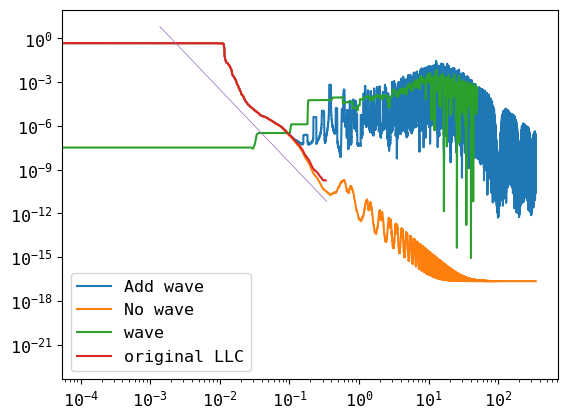

In [119]:
plt.plot(SSH_ps_x2.freq_i/dx, temp2,label='Add wave')
plt.plot(SSH_ps_x.freq_i/dx, temp,label='No wave')
plt.plot(SSH_ps_x3.freq_i, SSH_ps_x3.rolling(freq_i=200, center = True).mean(),label='wave')
plt.plot(SSH_ps_x4.freq_i/dx, SSH_ps_x4.mean(['j']).rolling(freq_i=200, center = True).mean(),label='original LLC')
plt.plot(SSH_ps_y.freq_j/dx, 2*1e-13*SSH_ps_y.freq_j**-5, linewidth=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()

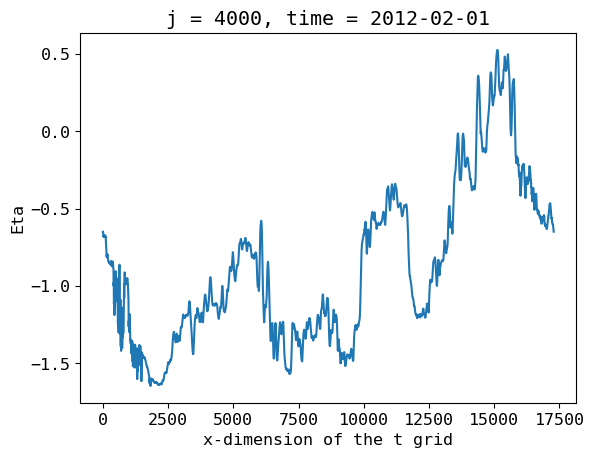

In [42]:
ds_sel_loaded.sel(j=4000).Eta.interp(i=np.linspace(1, 17279, 17279*100)).plot.line(label="original")
# ds_sel_loaded.sel(j=4500).Eta.plot.line(label="original")


In [54]:
ds_sel_loaded.sel(j=4000).Eta.interp(i=np.linspace(1, 17279, 17279*10))

<xarray.DataArray 'Eta' (i: 172790)>
array([-0.64970553, -0.64965815, -0.64961076, ..., -0.64820706,
       -0.64831721, -0.64842737])
Coordinates:
    j        int64 4000
    time     datetime64[ns] 2012-02-01
  * i        (i) float64 1.0 1.1 1.2 1.3 ... 1.728e+04 1.728e+04 1.728e+04

In [55]:
%%time
ds_sel_loaded.sel(j=slice(4000,4010,1)).Eta.interp(i=np.linspace(1, 17279, 17279*10),method="cubic").interpolate_na(dim="i")

CPU times: user 61.7 ms, sys: 13.2 ms, total: 74.9 ms
Wall time: 72.4 ms


<xarray.DataArray 'Eta' (j: 11, i: 172790)>
array([[-0.64970553, -0.64965819, -0.64960891, ..., -0.64820114,
        -0.64831326, -0.64842737],
       [-0.64968526, -0.64965889, -0.64963554, ..., -0.6481312 ,
        -0.64823694, -0.64834744],
       [-0.64961672, -0.64963023, -0.64964757, ..., -0.64849207,
        -0.64854855, -0.648606  ],
       ...,
       [-0.65101784, -0.65102585, -0.65104374, ..., -0.65034595,
        -0.65035726, -0.650365  ],
       [-0.65172142, -0.65174811, -0.65178039, ..., -0.65097071,
        -0.6509906 , -0.6510042 ],
       [-0.65258336, -0.65261639, -0.65265329, ..., -0.65190882,
        -0.65195306, -0.65198731]])
Coordinates:
  * j        (j) int64 4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010
    time     datetime64[ns] 2012-02-01
  * i        (i) float64 1.0 1.1 1.2 1.3 ... 1.728e+04 1.728e+04 1.728e+04

In [50]:
ds_sel_loaded.sel(j=slice(4000,4010,1)).Eta

<xarray.DataArray 'Eta' (j: 11, i: 17279)>
array([[-0.6497055 , -0.6492317 , -0.6492132 , ..., -0.64605045,
        -0.64732575, -0.64842737],
       [-0.64968526, -0.64958817, -0.6500229 , ..., -0.6463261 ,
        -0.64738125, -0.64834744],
       [-0.6496167 , -0.64994293, -0.65079176, ..., -0.64711887,
        -0.6480201 , -0.648606  ],
       ...,
       [-0.65101784, -0.6515033 , -0.6526816 , ..., -0.649968  ,
        -0.65017265, -0.650365  ],
       [-0.6517214 , -0.65224165, -0.6533347 , ..., -0.65023166,
        -0.6506584 , -0.6510042 ],
       [-0.65258336, -0.6530981 , -0.6540787 , ..., -0.6504165 ,
        -0.65130204, -0.6519873 ]], dtype=float32)
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 4000 4001 4002 4003 4004 4005 4006 4007 4008 4009 4010
    time     datetime64[ns] 2012-02-01

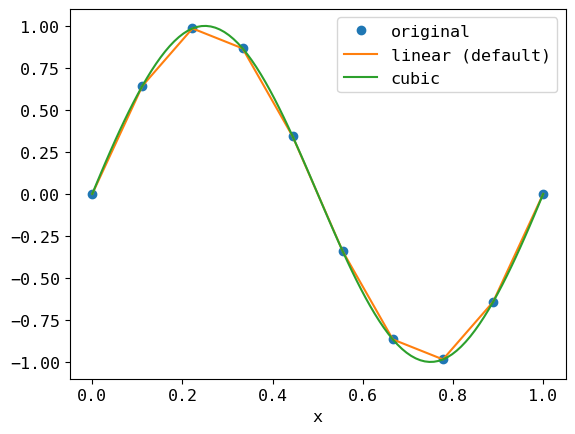

In [81]:
da = xr.DataArray(

    np.sin(np.linspace(0, 2 * np.pi, 10)),

    dims="x",

    coords={"x": np.linspace(0, 1, 10)},

)


da.plot.line("o", label="original")

da.interp(x=np.linspace(0, 1, 100)).plot.line(label="linear (default)")

da.interp(x=np.linspace(0, 1, 100), method="cubic").plot.line(label="cubic")

plt.legend()

In [93]:
da.interp(x=np.linspace(0, 1, 100))

<xarray.DataArray (x: 100)>
array([ 0.00000000e+00,  5.84352372e-02,  1.16870474e-01,  1.75305712e-01,
        2.33740949e-01,  2.92176186e-01,  3.50611423e-01,  4.09046661e-01,
        4.67481898e-01,  5.25917135e-01,  5.84352372e-01,  6.42787610e-01,
        6.73880350e-01,  7.04973090e-01,  7.36065831e-01,  7.67158571e-01,
        7.98251311e-01,  8.29344052e-01,  8.60436792e-01,  8.91529532e-01,
        9.22622272e-01,  9.53715013e-01,  9.84807753e-01,  9.74009358e-01,
        9.63210962e-01,  9.52412567e-01,  9.41614171e-01,  9.30815776e-01,
        9.20017381e-01,  9.09218985e-01,  8.98420590e-01,  8.87622195e-01,
        8.76823799e-01,  8.66025404e-01,  8.18388562e-01,  7.70751720e-01,
        7.23114878e-01,  6.75478036e-01,  6.27841194e-01,  5.80204353e-01,
        5.32567511e-01,  4.84930669e-01,  4.37293827e-01,  3.89656985e-01,
        3.42020143e-01,  2.79834663e-01,  2.17649182e-01,  1.55463702e-01,
        9.32782209e-02,  3.10927403e-02, -3.10927403e-02, -9.32782209e-02,
       -1.55463702e-01, -2.17649182e-01, -2.79834663e-01, -3.42020143e-01,
       -3.89656985e-01, -4.37293827e-01, -4.84930669e-01, -5.32567511e-01,
       -5.80204353e-01, -6.27841194e-01, -6.75478036e-01, -7.23114878e-01,
       -7.70751720e-01, -8.18388562e-01, -8.66025404e-01, -8.76823799e-01,
       -8.87622195e-01, -8.98420590e-01, -9.09218985e-01, -9.20017381e-01,
       -9.30815776e-01, -9.41614171e-01, -9.52412567e-01, -9.63210962e-01,
       -9.74009358e-01, -9.84807753e-01, -9.53715013e-01, -9.22622272e-01,
       -8.91529532e-01, -8.60436792e-01, -8.29344052e-01, -7.98251311e-01,
       -7.67158571e-01, -7.36065831e-01, -7.04973090e-01, -6.73880350e-01,
       -6.42787610e-01, -5.84352372e-01, -5.25917135e-01, -4.67481898e-01,
       -4.09046661e-01, -3.50611423e-01, -2.92176186e-01, -2.33740949e-01,
       -1.75305712e-01, -1.16870474e-01, -5.84352372e-02, -2.44929360e-16])
Coordinates:
  * x        (x) float64 0.0 0.0101 0.0202 0.0303 ... 0.9697 0.9798 0.9899 1.0

In [79]:
da

<xarray.DataArray (x: 10)>
array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])
Coordinates:
  * x        (x) float64 0.0 0.1111 0.2222 0.3333 ... 0.6667 0.7778 0.8889 1.0

In [48]:
# llc.to_netcdf('sshBIG.nc')
llc.isel(time=0).to_netcdf('ssh.nc')

[########################################] | 100% Completed | 1.22 sms


<timed exec>:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
<timed exec>:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


CPU times: user 17.3 s, sys: 4.92 s, total: 22.3 s
Wall time: 9.57 s


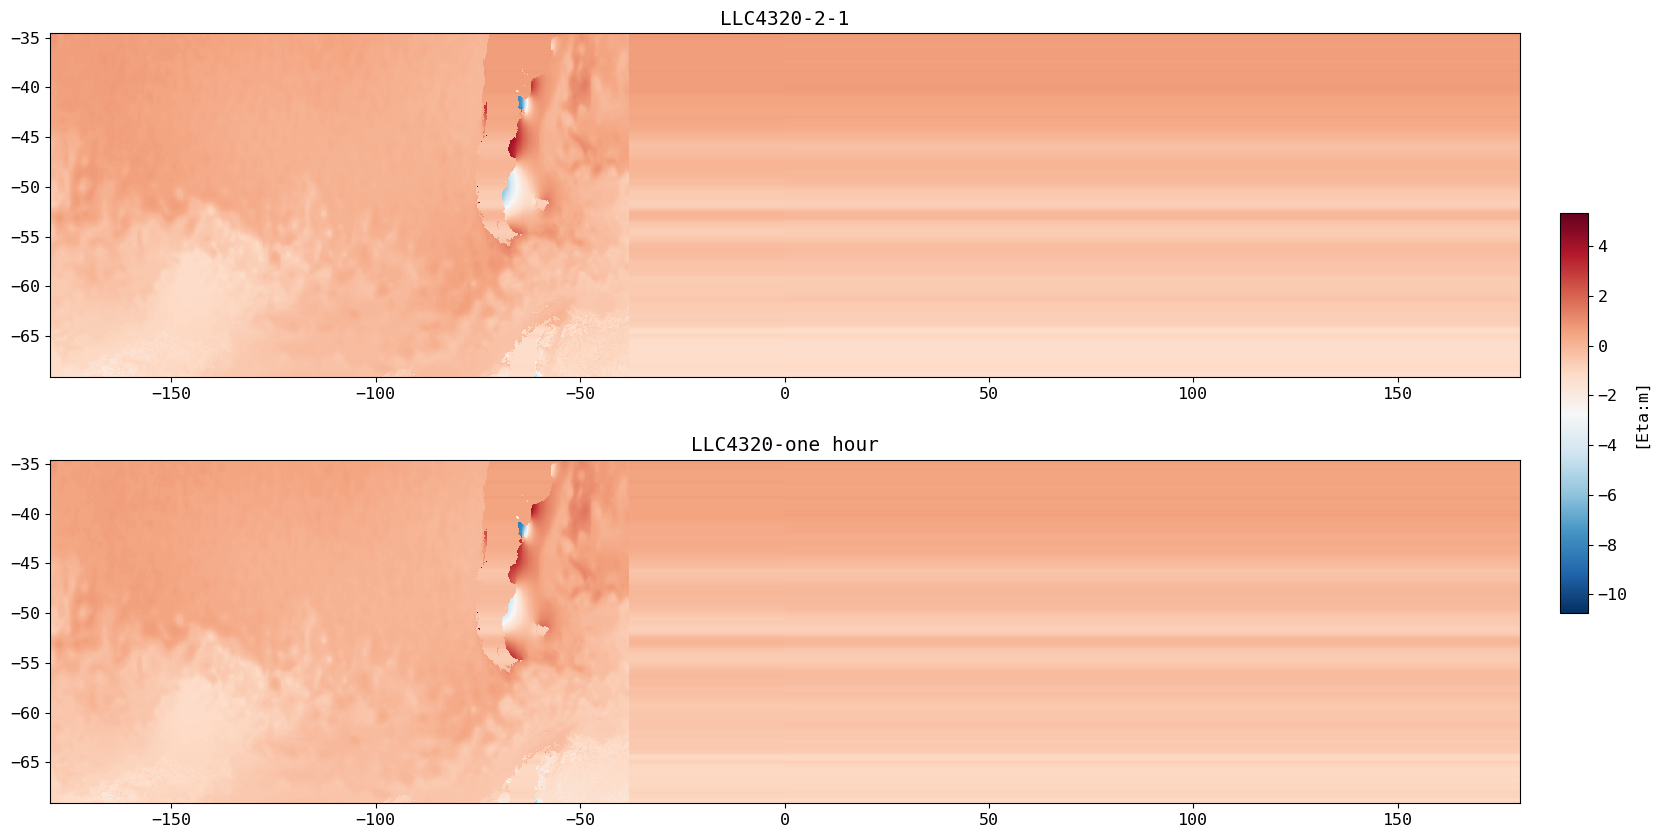

In [36]:
%%time
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
# fig.set_tight_layout(True)

im = axes[0].pcolormesh(llc.XC.isel(i=slice(0,None,10)), llc.YC.isel(i=slice(0,None,10)),llc.Eta.isel(time=0,i=slice(0,None,10)),cmap='RdBu_r',  rasterized=True, shading='auto')

axes[1].pcolormesh(llc.XC.isel(i=slice(0,None,10)), llc.YC.isel(i=slice(0,None,10)),llc.Eta.isel(time=1,i=slice(0,None,10)),cmap='RdBu_r',  rasterized=True, shading='auto')


axes[0].set_title(r"LLC4320-2-1", fontsize=14)
axes[1].set_title(r"LLC4320-one hour", fontsize=14)


fig.subplots_adjust(right=0.86, hspace=.24) 
cbax = fig.add_axes([0.88, 0.3, 0.014, 0.4])
cbar = fig.colorbar(im, orientation='vertical', cax=cbax)
cbar.set_label(r"[Eta:m]", fontsize=12)
# fig.savefig("test_rasterization.png", dpi=150)

In [37]:
SST_sel = ds.SST.isel(i=slice(i1, i2,1),j=slice(j1,j2,1))

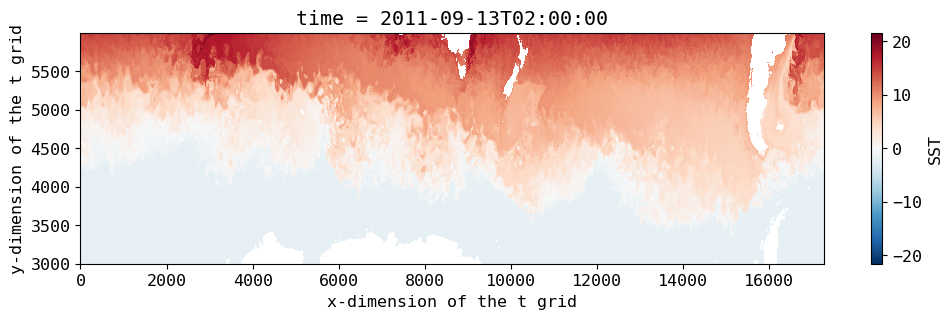

In [39]:
# SST_sel.isel(time=-2).plot()
SST_sel.isel(time=2,i=slice(0,None,10)).plot(shading='auto',figsize=(12,3))

In [40]:
SSS_sel = ds.SSS.isel(i=slice(i1, i2,1),j=slice(j1,j2,1))

In [41]:
SSS_sel

<xarray.DataArray 'SSS' (time: 9030, j: 3000, i: 17279)>
dask.array<getitem, shape=(9030, 3000, 17279), dtype=float32, chunksize=(1, 1680, 4320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

In [42]:
from fastjmd95 import rho
ds['SSD'] = xr.apply_ufunc(rho, 
                        ds.SSS, ds.SST, 0, 
                        dask='parallelized', output_dtypes=[float,]).rename('SSD')

In [43]:
ds

,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,27 Graph Layers,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.36 TiB,71.19 MiB
Shape,"(9030, 12960, 17280)","(1, 4320, 4320)"
Count,27 Graph Layers,108360 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [44]:
SSD_sel = ds.SSD.isel(i=slice(i1, i2,1),j=slice(j1,j2,1))

In [45]:
SSD_sel

<xarray.DataArray 'SSD' (time: 9030, j: 3000, i: 17279)>
dask.array<getitem, shape=(9030, 3000, 17279), dtype=float64, chunksize=(1, 1680, 4320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00

In [46]:
U_sel = ds.U.isel(i_g=slice(i1, i2,1), j=slice(j1,j2,1))

V_sel = ds.V.isel(i=slice(i1, i2,1), j_g=slice(j1,j2,1))

In [47]:
# SST_sel.i.values

In [48]:
# pick out the coordinates 

dxC_sel = coords.dxC.isel(i_g=slice(i1, i2,1), j=slice(j1,j2,1))
dyG_sel = coords.dyG.isel(i_g=slice(i1, i2,1), j=slice(j1,j2,1))
dyC_sel = coords.dyC.isel(i=slice(i1, i2,1), j_g=slice(j1,j2,1))
dxG_sel = coords.dxG.isel(i=slice(i1, i2,1), j_g=slice(j1,j2,1))
rA_sel = coords.rA.isel(i=slice(i1, i2,1), j=slice(j1,j2,1))
rAz_sel = coords.rAz.isel(i_g=slice(i1, i2,1), j_g=slice(j1,j2,1))
XC_sel = coords.XC.isel(i=slice(i1, i2,1), j=slice(j1,j2,1))
YC_sel = coords.YC.isel(i=slice(i1, i2,1), j=slice(j1,j2,1))

coords_sel = xr.merge([XC_sel, YC_sel, dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel, rA_sel, rAz_sel])

In [49]:
ds_sel = xr.merge([U_sel, V_sel, SST_sel, SSS_sel, SSD_sel])

In [50]:
ds_sel

<xarray.Dataset>
Dimensions:  (j: 3000, time: 9030, i_g: 17279, i: 17279, j_g: 3000)
Coordinates:
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * i_g      (i_g) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
Data variables:
    U        (time, j, i_g) float32 dask.array<chunksize=(1, 1320, 4319), meta=np.ndarray>
    V        (time, j_g, i) float32 dask.array<chunksize=(1, 1320, 4319), meta=np.ndarray>
    SST      (time, j, i) float32 dask.array<chunksize=(1, 1320, 4319), meta=np.ndarray>
    SSS      (time, j, i) float32 dask.array<chunksize=(1, 1320, 4319), meta=np.ndarray>
    SSD      (time, j, i) float64 dask.array<chunksize=(1, 1320, 4319), meta=np.ndarray>

In [51]:
coords_sel

<xarray.Dataset>
Dimensions:  (i: 17279, j: 3000, i_g: 17279, j_g: 3000)
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
  * i_g      (i_g) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j_g      (j_g) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
Data variables:
    XC       (j, i) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    rA       (j, i) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(1320, 4319), meta=np.ndarray>
Attributes:
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [52]:
grid = xgcm.Grid(coords_sel, periodic=None)

In [53]:
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

In [54]:
rho_x = grid.interp(grid.diff(SSD_sel, 'X', boundary='extend')/coords_sel.dxC, 
                    'X',boundary='extend')
rho_y = grid.interp(grid.diff(SSD_sel, 'Y', boundary='extend')/coords_sel.dyC, 
                    'Y',boundary='extend')

In [55]:
grad_rho = np.abs(rho_x) + np.abs(rho_y) 
grad_rho

<xarray.DataArray (time: 9030, j: 3000, i: 17279)>
dask.array<add, shape=(9030, 3000, 17279), dtype=float64, chunksize=(1, 1679, 4320), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999
Dimensions without coordinates: time

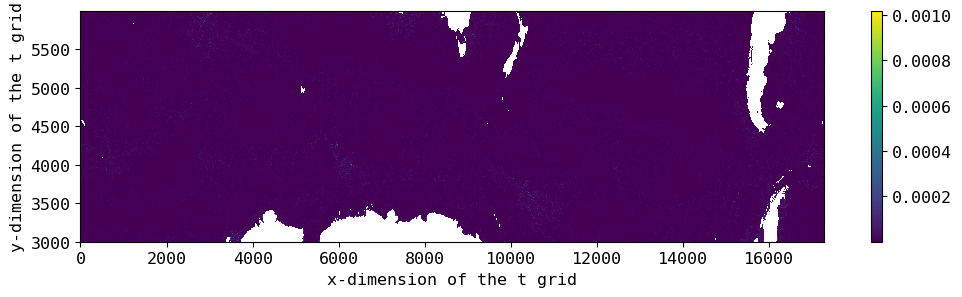

In [56]:
# grad_rho.isel(time=2).sel(i=slice(7400, 7800,1), j=slice(8800,9100,1)).plot()
grad_rho.isel(time=2,i=slice(0,None,10)).plot(shading='auto',figsize=(12,3))

In [57]:
# relative volitity
zeta =   (-grid.diff(ds_sel.U * coords_sel.dxC, 'Y', boundary='extend') +
             grid.diff(ds_sel.V * coords_sel.dyC, 'X', boundary='extend')
         )/coords_sel.rAz

zeta = grid.interp(grid.interp(zeta, 'X', boundary='extend'),
                   'Y', boundary='extend')

In [58]:
temp_zeta = zeta.isel(time=0)
temp_zeta.load()

<xarray.DataArray (j: 3000, i: 17279)>
array([[ 1.4777984e-06,  2.5218885e-06,  3.2162677e-06, ...,
        -5.7062734e-06, -9.0545063e-06, -3.2320286e-06],
       [ 1.3960287e-06,  2.8027546e-06,  3.8927519e-06, ...,
        -4.9992123e-06, -6.5086469e-06, -2.6743949e-06],
       [ 2.0077684e-06,  3.5868773e-06,  4.3938167e-06, ...,
        -3.8383841e-06, -1.0946090e-06,  7.3134470e-07],
       ...,
       [-7.8707875e-05, -2.2891662e-05,  1.3699906e-05, ...,
        -1.6242810e-05, -2.7066490e-05, -3.1324071e-05],
       [-3.0518819e-05,  2.8074122e-05,  5.5663630e-05, ...,
        -4.6959627e-05, -3.6351819e-05, -2.1895650e-05],
       [ 1.0828203e-05,  6.6988920e-05,  8.1579201e-05, ...,
        -6.5327957e-05, -3.2051394e-05, -3.9199958e-06]], dtype=float32)
Coordinates:
  * i        (i) int64 1 2 3 4 5 6 7 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 3000 3001 3002 3003 3004 ... 5995 5996 5997 5998 5999

In [ ]:
temp = grad_rho.isel(time=0)
temp.load()

In [ ]:
XCmean = coords_sel.XC.mean('j')
YCmean = coords_sel.YC.mean('i')

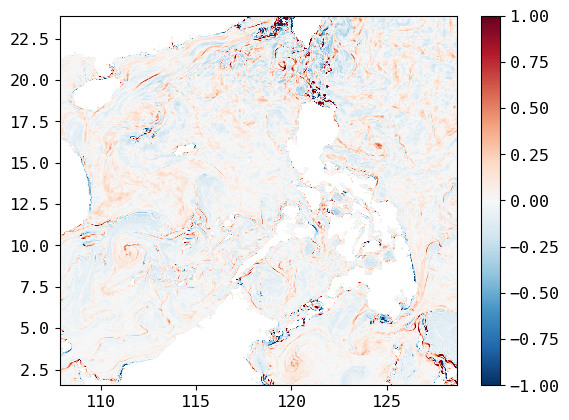

In [71]:
plt.pcolormesh(XCmean.isel(i=slice(0,None,10)), YCmean.isel(i=slice(0,None,10)), temp_zeta.isel(i=slice(0,None,10))/1e-4, 
               vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()

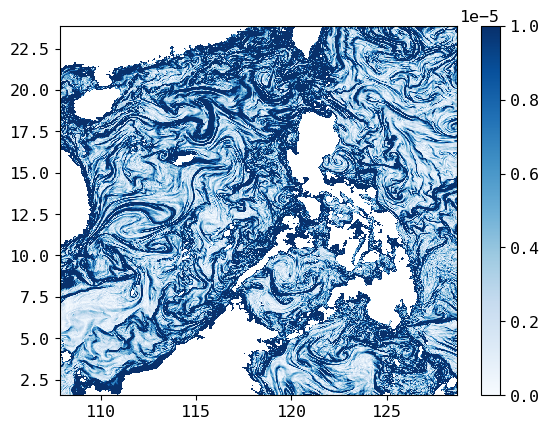

In [72]:
plt.pcolormesh(XCmean, YCmean, temp, 
               vmin=0, vmax=1e-5, cmap='Blues')
plt.colorbar()

In [73]:
SST_seasonal = ds_sel.SST.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])
SSD_seasonal = ds_sel.SSD.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])

In [74]:
ds_sel.SST.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             )

<xarray.DataArray 'SST' (time: 37, j: 120, i: 100)>
dask.array<getitem, shape=(37, 120, 100), dtype=float32, chunksize=(1, 64, 100), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 8000 8010 8020 8030 8040 ... 9150 9160 9170 9180 9190
  * time     (time) datetime64[ns] 2011-09-13 2011-09-23 ... 2012-09-07
  * i        (i) int64 7000 7010 7020 7030 7040 ... 7950 7960 7970 7980 7990

In [75]:
SST_seasonal.load();

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


In [76]:
%%time
SSD_seasonal.load();

CPU times: user 1min 2s, sys: 16.6 s, total: 1min 19s
Wall time: 14.4 s


<xarray.DataArray 'SSD' (month: 12)>
array([1021.30295273, 1021.34088718, 1021.0326314 , 1020.49274053,
       1020.03226861, 1020.27093688, 1020.16519107, 1020.36348635,
       1020.302987  , 1020.60642101, 1020.69552298, 1020.98192988])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

CPU times: user 20.1 ms, sys: 1.66 ms, total: 21.7 ms
Wall time: 18.2 ms


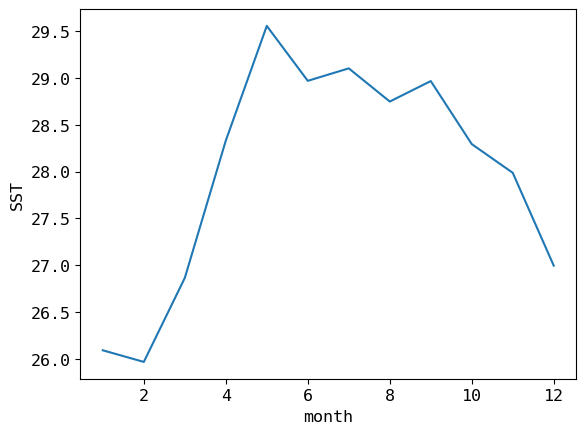

In [77]:
%%time
SST_seasonal.plot()

In [81]:
# density
SSD_k_ps = xrft.power_spectrum(ds_sel['SSD'], 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('SSD_psd')
SSD_k_ps

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


<xarray.DataArray 'SSD_psd' (time: 9030, j: 1200, freq_i: 1000)>
dask.array<mul, shape=(9030, 1200, 1000), dtype=float64, chunksize=(1, 640, 1000), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 8000 8001 8002 8003 8004 ... 9195 9196 9197 9198 9199
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499

In [83]:
# KE 
U_k_ps = xrft.power_spectrum(grid.interp(ds_sel['U'],'X',boundary='extend'), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('U_psd')

V_k_ps = xrft.power_spectrum(grid.interp(ds_sel['V'],'Y',boundary='extend'), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('V_psd')

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


In [84]:
U_k_ps

<xarray.DataArray 'U_psd' (time: 9030, j: 1200, freq_i: 1000)>
dask.array<mul, shape=(9030, 1200, 1000), dtype=float64, chunksize=(1, 640, 1000), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 8000 8001 8002 8003 8004 ... 9195 9196 9197 9198 9199
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499
Dimensions without coordinates: time

In [85]:
EKE_k_ps = (0.5*(U_k_ps + V_k_ps)).rename('EKE_psd')

In [86]:
EKE_k_ps

<xarray.DataArray 'EKE_psd' (time: 9030, j: 1200, freq_i: 1000)>
dask.array<mul, shape=(9030, 1200, 1000), dtype=float64, chunksize=(1, 640, 1000), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 8000 8001 8002 8003 8004 ... 9195 9196 9197 9198 9199
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499
Dimensions without coordinates: time

In [87]:
dx = (110*(coords_sel.XC.isel(i=1) - 
            coords_sel.XC.isel(i=0))*np.cos(
            coords_sel.YC.mean('i')*np.pi/180)).mean('j')

In [88]:
%%time
EKE_ps_OND = EKE_k_ps.isel(time=slice(0,10*24)).mean('time').mean('j')
EKE_ps_OND
EKE_ps_OND.load()                     

CPU times: user 3min 22s, sys: 1min 38s, total: 5min
Wall time: 2min 24s


<xarray.DataArray 'EKE_psd' (freq_i: 1000)>
array([1.63494473e-06, 1.66001417e-06, 1.66675928e-06, 1.65581319e-06,
       1.78650898e-06, 1.74232505e-06, 1.90011387e-06, 1.80807727e-06,
       1.86305827e-06, 1.72705596e-06, 1.76960675e-06, 1.66757986e-06,
       1.61283388e-06, 1.68242036e-06, 1.55394056e-06, 1.73042112e-06,
       1.59478083e-06, 1.69655131e-06, 1.49798632e-06, 1.58686032e-06,
       1.60755986e-06, 1.55317088e-06, 1.60953540e-06, 1.56944731e-06,
       1.73806243e-06, 1.53897109e-06, 1.70693335e-06, 1.49907039e-06,
       1.68893388e-06, 1.48831219e-06, 1.60235271e-06, 1.63307605e-06,
       1.76069167e-06, 1.81115341e-06, 1.81822922e-06, 1.77939706e-06,
       1.86007981e-06, 2.06649036e-06, 2.01597346e-06, 2.25829521e-06,
       2.07630260e-06, 2.32198738e-06, 2.12336716e-06, 2.42004944e-06,
       2.27159571e-06, 2.48949257e-06, 2.41950701e-06, 2.46353307e-06,
       2.49652626e-06, 2.63011160e-06, 2.52515269e-06, 2.60463731e-06,
       2.63162854e-06, 2.78540578e-06, 2.82775757e-06, 2.88241030e-06,
       2.85596493e-06, 2.95782740e-06, 2.86681830e-06, 2.90883727e-06,
       2.99107054e-06, 3.06955523e-06, 3.10346697e-06, 3.30855190e-06,
       3.22108985e-06, 3.21612244e-06, 3.36543548e-06, 3.36046881e-06,
       3.50123010e-06, 3.43425254e-06, 3.70018082e-06, 3.61221345e-06,
       3.97434556e-06, 3.95208567e-06, 4.20696163e-06, 4.04644781e-06,
       4.01642939e-06, 4.09410929e-06, 4.29898706e-06, 4.36429500e-06,
...
       4.55521308e-06, 4.36429500e-06, 4.29898706e-06, 4.09410929e-06,
       4.01642939e-06, 4.04644781e-06, 4.20696163e-06, 3.95208567e-06,
       3.97434556e-06, 3.61221345e-06, 3.70018082e-06, 3.43425254e-06,
       3.50123010e-06, 3.36046881e-06, 3.36543548e-06, 3.21612244e-06,
       3.22108985e-06, 3.30855190e-06, 3.10346697e-06, 3.06955523e-06,
       2.99107054e-06, 2.90883727e-06, 2.86681830e-06, 2.95782740e-06,
       2.85596493e-06, 2.88241030e-06, 2.82775757e-06, 2.78540578e-06,
       2.63162854e-06, 2.60463731e-06, 2.52515269e-06, 2.63011160e-06,
       2.49652626e-06, 2.46353307e-06, 2.41950701e-06, 2.48949257e-06,
       2.27159571e-06, 2.42004944e-06, 2.12336716e-06, 2.32198738e-06,
       2.07630260e-06, 2.25829521e-06, 2.01597346e-06, 2.06649036e-06,
       1.86007981e-06, 1.77939706e-06, 1.81822922e-06, 1.81115341e-06,
       1.76069167e-06, 1.63307605e-06, 1.60235271e-06, 1.48831219e-06,
       1.68893388e-06, 1.49907039e-06, 1.70693335e-06, 1.53897109e-06,
       1.73806243e-06, 1.56944731e-06, 1.60953540e-06, 1.55317088e-06,
       1.60755986e-06, 1.58686032e-06, 1.49798632e-06, 1.69655131e-06,
       1.59478083e-06, 1.73042112e-06, 1.55394056e-06, 1.68242036e-06,
       1.61283388e-06, 1.66757986e-06, 1.76960675e-06, 1.72705596e-06,
       1.86305827e-06, 1.80807727e-06, 1.90011387e-06, 1.74232505e-06,
       1.78650898e-06, 1.65581319e-06, 1.66675928e-06, 1.66001417e-06])
Coordinates:
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499

In [89]:
%%time
EKE_ps_AMJ = EKE_k_ps.isel(time=24*30*5).mean('j')
EKE_ps_AMJ.load()    

CPU times: user 1.73 s, sys: 264 ms, total: 1.99 s
Wall time: 1.81 s


<xarray.DataArray 'EKE_psd' (freq_i: 1000)>
array([2.94019975e-07, 3.12122157e-06, 1.14845413e-06, 4.77269280e-06,
       4.77141652e-07, 4.60035953e-06, 2.04887551e-06, 2.08939089e-06,
       1.96532997e-06, 2.90396801e-06, 2.03596822e-06, 2.00078208e-06,
       5.85721240e-06, 3.47901972e-07, 3.83463944e-06, 7.04323216e-07,
       8.07072441e-06, 6.96559528e-07, 7.77863560e-06, 2.37171930e-06,
       1.03252571e-05, 1.79720162e-06, 2.83817666e-06, 4.65208742e-07,
       6.28724445e-06, 4.26770696e-06, 2.58576448e-06, 2.59081551e-06,
       2.33777827e-06, 7.26912074e-06, 1.33981814e-06, 7.66252620e-06,
       2.78189796e-06, 1.27572368e-05, 2.87398308e-06, 6.98556267e-06,
       2.66683758e-06, 1.09688987e-05, 2.43826345e-07, 1.94213330e-06,
       1.35002809e-06, 3.94556092e-06, 1.73694957e-07, 2.42084802e-06,
       7.85687394e-07, 2.94703577e-06, 4.91999215e-06, 1.15724391e-06,
       8.88761028e-07, 2.01344426e-06, 3.13304623e-06, 2.18390754e-06,
       1.69362236e-06, 1.49809650e-06, 1.44340136e-06, 1.54621377e-06,
       1.01476978e-06, 6.13008550e-07, 1.18481041e-06, 5.26214273e-06,
       1.28499498e-06, 2.65326346e-06, 2.42016172e-06, 1.14891854e-06,
       1.37695781e-06, 6.70553232e-07, 1.81733735e-06, 5.50749175e-07,
       2.04304142e-06, 1.07737496e-06, 3.12101150e-06, 1.02864962e-06,
       6.94781402e-06, 1.58222463e-06, 4.25563903e-06, 2.41421088e-06,
       7.24255518e-06, 2.15346460e-06, 2.36623613e-06, 1.69904960e-06,
...
       4.09697002e-06, 1.69904960e-06, 2.36623613e-06, 2.15346460e-06,
       7.24255518e-06, 2.41421088e-06, 4.25563903e-06, 1.58222463e-06,
       6.94781402e-06, 1.02864962e-06, 3.12101150e-06, 1.07737496e-06,
       2.04304142e-06, 5.50749175e-07, 1.81733735e-06, 6.70553232e-07,
       1.37695781e-06, 1.14891854e-06, 2.42016172e-06, 2.65326346e-06,
       1.28499498e-06, 5.26214273e-06, 1.18481041e-06, 6.13008550e-07,
       1.01476978e-06, 1.54621377e-06, 1.44340136e-06, 1.49809650e-06,
       1.69362236e-06, 2.18390754e-06, 3.13304623e-06, 2.01344426e-06,
       8.88761028e-07, 1.15724391e-06, 4.91999215e-06, 2.94703577e-06,
       7.85687394e-07, 2.42084802e-06, 1.73694957e-07, 3.94556092e-06,
       1.35002809e-06, 1.94213330e-06, 2.43826345e-07, 1.09688987e-05,
       2.66683758e-06, 6.98556267e-06, 2.87398308e-06, 1.27572368e-05,
       2.78189796e-06, 7.66252620e-06, 1.33981814e-06, 7.26912074e-06,
       2.33777827e-06, 2.59081551e-06, 2.58576448e-06, 4.26770696e-06,
       6.28724445e-06, 4.65208742e-07, 2.83817666e-06, 1.79720162e-06,
       1.03252571e-05, 2.37171930e-06, 7.77863560e-06, 6.96559528e-07,
       8.07072441e-06, 7.04323216e-07, 3.83463944e-06, 3.47901972e-07,
       5.85721240e-06, 2.00078208e-06, 2.03596822e-06, 2.90396801e-06,
       1.96532997e-06, 2.08939089e-06, 2.04887551e-06, 4.60035953e-06,
       4.77141652e-07, 4.77269280e-06, 1.14845413e-06, 3.12122157e-06])
Coordinates:
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499

In [90]:
EKE_ps_AMJ

<xarray.DataArray 'EKE_psd' (freq_i: 1000)>
array([2.94019975e-07, 3.12122157e-06, 1.14845413e-06, 4.77269280e-06,
       4.77141652e-07, 4.60035953e-06, 2.04887551e-06, 2.08939089e-06,
       1.96532997e-06, 2.90396801e-06, 2.03596822e-06, 2.00078208e-06,
       5.85721240e-06, 3.47901972e-07, 3.83463944e-06, 7.04323216e-07,
       8.07072441e-06, 6.96559528e-07, 7.77863560e-06, 2.37171930e-06,
       1.03252571e-05, 1.79720162e-06, 2.83817666e-06, 4.65208742e-07,
       6.28724445e-06, 4.26770696e-06, 2.58576448e-06, 2.59081551e-06,
       2.33777827e-06, 7.26912074e-06, 1.33981814e-06, 7.66252620e-06,
       2.78189796e-06, 1.27572368e-05, 2.87398308e-06, 6.98556267e-06,
       2.66683758e-06, 1.09688987e-05, 2.43826345e-07, 1.94213330e-06,
       1.35002809e-06, 3.94556092e-06, 1.73694957e-07, 2.42084802e-06,
       7.85687394e-07, 2.94703577e-06, 4.91999215e-06, 1.15724391e-06,
       8.88761028e-07, 2.01344426e-06, 3.13304623e-06, 2.18390754e-06,
       1.69362236e-06, 1.49809650e-06, 1.44340136e-06, 1.54621377e-06,
       1.01476978e-06, 6.13008550e-07, 1.18481041e-06, 5.26214273e-06,
       1.28499498e-06, 2.65326346e-06, 2.42016172e-06, 1.14891854e-06,
       1.37695781e-06, 6.70553232e-07, 1.81733735e-06, 5.50749175e-07,
       2.04304142e-06, 1.07737496e-06, 3.12101150e-06, 1.02864962e-06,
       6.94781402e-06, 1.58222463e-06, 4.25563903e-06, 2.41421088e-06,
       7.24255518e-06, 2.15346460e-06, 2.36623613e-06, 1.69904960e-06,
...
       4.09697002e-06, 1.69904960e-06, 2.36623613e-06, 2.15346460e-06,
       7.24255518e-06, 2.41421088e-06, 4.25563903e-06, 1.58222463e-06,
       6.94781402e-06, 1.02864962e-06, 3.12101150e-06, 1.07737496e-06,
       2.04304142e-06, 5.50749175e-07, 1.81733735e-06, 6.70553232e-07,
       1.37695781e-06, 1.14891854e-06, 2.42016172e-06, 2.65326346e-06,
       1.28499498e-06, 5.26214273e-06, 1.18481041e-06, 6.13008550e-07,
       1.01476978e-06, 1.54621377e-06, 1.44340136e-06, 1.49809650e-06,
       1.69362236e-06, 2.18390754e-06, 3.13304623e-06, 2.01344426e-06,
       8.88761028e-07, 1.15724391e-06, 4.91999215e-06, 2.94703577e-06,
       7.85687394e-07, 2.42084802e-06, 1.73694957e-07, 3.94556092e-06,
       1.35002809e-06, 1.94213330e-06, 2.43826345e-07, 1.09688987e-05,
       2.66683758e-06, 6.98556267e-06, 2.87398308e-06, 1.27572368e-05,
       2.78189796e-06, 7.66252620e-06, 1.33981814e-06, 7.26912074e-06,
       2.33777827e-06, 2.59081551e-06, 2.58576448e-06, 4.26770696e-06,
       6.28724445e-06, 4.65208742e-07, 2.83817666e-06, 1.79720162e-06,
       1.03252571e-05, 2.37171930e-06, 7.77863560e-06, 6.96559528e-07,
       8.07072441e-06, 7.04323216e-07, 3.83463944e-06, 3.47901972e-07,
       5.85721240e-06, 2.00078208e-06, 2.03596822e-06, 2.90396801e-06,
       1.96532997e-06, 2.08939089e-06, 2.04887551e-06, 4.60035953e-06,
       4.77141652e-07, 4.77269280e-06, 1.14845413e-06, 3.12122157e-06])
Coordinates:
  * freq_i   (freq_i) float64 -0.5 -0.499 -0.498 -0.497 ... 0.497 0.498 0.499

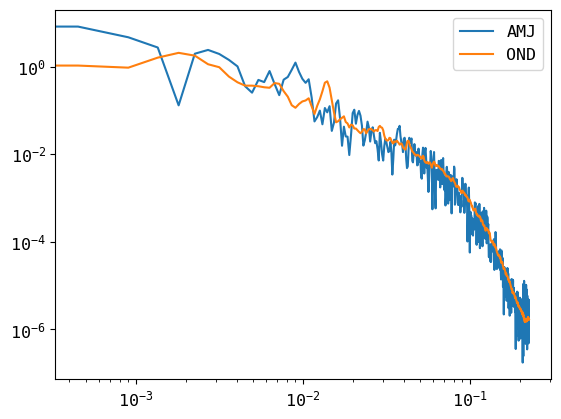

In [91]:
k = EKE_ps_AMJ.freq_i/dx

plt.plot(k, EKE_ps_AMJ, label='AMJ')
plt.plot(k, EKE_ps_OND, label='OND')

plt.xscale('log')
plt.yscale('log')
plt.legend()

CPU times: user 1.15 s, sys: 337 ms, total: 1.49 s
Wall time: 1.04 s


<xarray.Dataset>
Dimensions:  (i: 1000, j: 1200)
Coordinates:
  * i        (i) int64 7000 7001 7002 7003 7004 ... 7995 7996 7997 7998 7999
  * j        (j) int64 8000 8001 8002 8003 8004 ... 9195 9196 9197 9198 9199
    time     datetime64[ns] 2012-02-01
Data variables:
    Eta      (j, i) float32 0.7437 0.7439 0.744 0.744 ... 1.22 1.231 1.244 1.254
    XC       (j, i) float32 107.8 107.9 107.9 107.9 ... 128.6 128.6 128.6 128.7
    YC       (j, i) float32 1.558 1.558 1.558 1.558 ... 23.87 23.87 23.87 23.87

/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


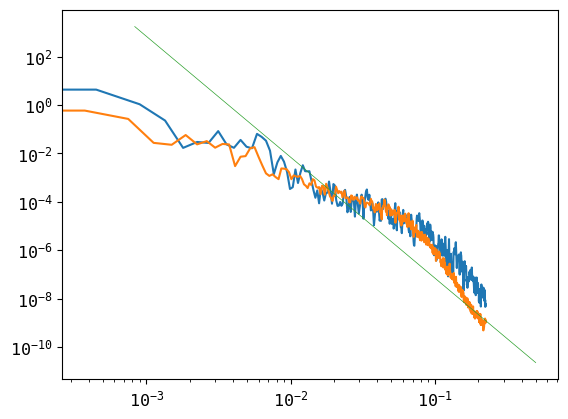